In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

df = pd.read_csv(r'C:\Users\singh\Documents\DATA ANALYTICS BOOTCAMP\data_jobs.csv')

# converting the job_posted_date object to datetime
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

# filtering the dataset only for the data analyst role and country == India
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# drop nan values from the year salary
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

<Axes: >

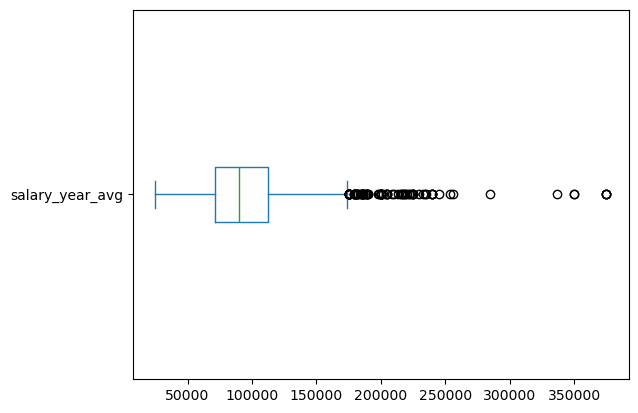

In [2]:
df_DA_US['salary_year_avg'].plot(kind='box', vert = False)

**Now we will compare the salary year avg for different jobs**

In [3]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) &  (df['job_country']== 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles ]

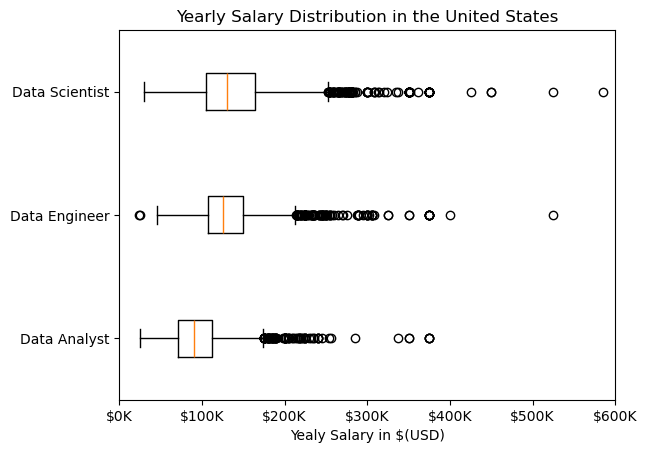

In [11]:
plt.boxplot(job_list, tick_labels = job_titles, vert = False)
plt.title('Yearly Salary Distribution in the United States')
plt.xlabel('Yealy Salary in $(USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()